# Lab: Titanic EDA

This week is all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic's passenger manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework

This is a fairly common 'toy' dataset (although it's definitely dirty) used for teaching cleaning and some modeling. You can find out more here: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

## Step 1: Reading the data

1. If you look at the dataset directory, you'll see a .csv and a .txt file. The .csv is your data. The .txt is a brief data dictionary.
2. Take a minute read the data dictionary and understand how the data is structured.
3. In this notebook, load the csv into pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Section

In [2]:
titanic_data.shape

(891, 11)

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
titanic_data.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [5]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note**: The age column has some missing values

**Note**: Some ages less than 1. We are going to assume they are babies.

In [6]:
titanic_data.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [10]:
titanic_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

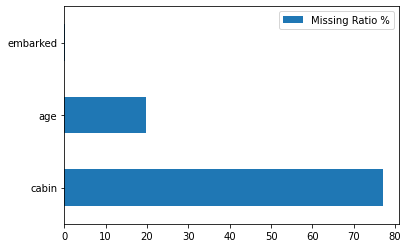

In [9]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
        
plot_nas(titanic_data)

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

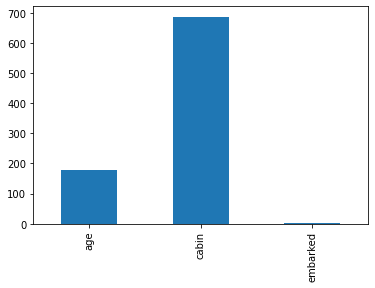

In [14]:
titanic_data.isna().sum()[titanic_data.isna().sum()>0].plot(kind='bar')
titanic_data.isna().sum()

In [15]:
titanic_data.dropna(subset=['embarked'], inplace=True)

In [17]:
titanic_data['embarked'].isnull().sum()

0

In [18]:
titanic_data['cabin'].fillna('¯\(ツ)/¯', inplace=True)
titanic_data['cabin'].unique()

array(['¯\\(ツ)/¯', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
      

In [94]:
titanic_data['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [20]:
titanic_data['familycount'] = titanic_data['sibsp'] + titanic_data['parch']
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [21]:
titanic_data[titanic_data.name.str.contains('Rev')]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [24]:
titanic_data['IsReverend']= np.where(titanic_data.name.str.contains('Rev'), 1, 0)
titanic_data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [25]:
titanic_data['Embarked_C']= np.where(titanic_data['embarked'] == 'C', 1, 0)
titanic_data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1


In [26]:
titanic_data['Embarked_Q']= np.where(titanic_data['embarked'] == 'Q', 1, 0)
titanic_data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0


In [27]:
titanic_data['Embarked_S']= np.where(titanic_data['embarked'] == 'S', 1, 0)
titanic_data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


In [28]:
titanic_data['sex_1']= np.where(titanic_data['sex'] == 'female', 1, 0)
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,sex_1
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0


In [30]:
titanic_data[titanic_data.name.str.contains('Master')]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,sex_1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0,0,0,1,0
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,¯\(ツ)/¯,Q,5,0,0,1,0,0
50,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,¯\(ツ)/¯,S,5,0,0,0,1,0
59,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,¯\(ツ)/¯,S,7,0,0,0,1,0
63,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,¯\(ツ)/¯,S,5,0,0,0,1,0
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,¯\(ツ)/¯,C,2,0,1,0,0,0
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,¯\(ツ)/¯,S,2,0,0,0,1,0
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,¯\(ツ)/¯,C,1,0,1,0,0,0
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,S,10,0,0,0,1,0
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,¯\(ツ)/¯,S,5,0,0,0,1,0


In [35]:
titanic_data['Title'] = titanic_data.name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
titanic_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,sex_1,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,Mr


## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [60]:
# 1. What was the survival rate overall?
titanic_data['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

0    61.754780652418454%
1     38.24521934758155%
Name: survived, dtype: object

In [61]:
#2. Which gender fared the worst? What was their survival rate?
titanic_data.groupby('sex')['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

sex     survived
female  1            74.03846153846155%
        0           25.961538461538463%
male    0            81.10918544194108%
        1           18.890814558058924%
Name: survived, dtype: object

In [62]:
#3. What was the survival rate for each Pclass?
titanic_data.groupby('pclass')['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

pclass  survived
1       1           62.616822429906534%
        0            37.38317757009346%
2       0            52.71739130434783%
        1            47.28260869565217%
3       0            75.76374745417516%
        1           24.236252545824847%
Name: survived, dtype: object

In [74]:
#4. Did any reverends survive? How many?
#((titanic_data['Title']=='Rev') & (titanic_data['survived']==1)).sum()

((titanic_data.name.str.contains('Rev')) & (titanic_data['survived']==1)).sum()

0

In [79]:
#5. What is the survival rate for cabins marked ¯\(ツ)/¯
titanic_data.groupby('cabin')['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

cabin    survived
A10      0                        100.0%
A14      0                        100.0%
A16      1                        100.0%
A19      0                        100.0%
A20      1                        100.0%
                            ...         
G6       0                         50.0%
         1                         50.0%
T        0                        100.0%
¯\(ツ)/¯  0            70.01455604075691%
         1           29.985443959243085%
Name: survived, Length: 164, dtype: object

In [89]:
Marked_Cabin = titanic_data.groupby('cabin')['survived'].sum()/titanic_data.groupby('cabin')['name'].count()*100
Marked_Cabin.filter(items=['¯\(ツ)/¯'])

cabin
¯\(ツ)/¯    29.985444
dtype: float64

In [138]:
#6. What is the survival rate for people whose Age is empty?
number_survivors = titanic_data[titanic_data.columns[1]].sum()
age_mask = [pd.isnull(x) for x in titanic_data.age]
age_survival = [age for index, age in enumerate(titanic_data.survived) if age_mask[index]]
age_survival = np.array([age_survival])
age_survival_rate = (age_survival.sum() / number_survivors.sum() * 100)
print('Empty Age category survival rate was: {}%'.format(age_survival_rate))

Empty Age category survival rate was: 2.5304136253041363%


In [119]:
# 7. What is the survival rate for each port of embarkation?
titanic_data.groupby('embarked')['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

embarked  survived
C         1            55.35714285714286%
          0           44.642857142857146%
Q         0           61.038961038961034%
          1           38.961038961038966%
S         0            66.30434782608695%
          1            33.69565217391305%
Name: survived, dtype: object

In [125]:
#8. What is the survival rate for children (under 12) in each Pclass?
titanic_data.loc[(titanic_data['age']<12)].groupby('pclass')['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

pclass  survived
1       1                        75.0%
        0                        25.0%
2       1                       100.0%
3       0           59.57446808510638%
        1           40.42553191489361%
Name: survived, dtype: object

In [36]:
# 9. Did the captain of the ship survive? Is he on the list?

titanic_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
titanic_data[titanic_data['Title']=='Capt']
# titanic_data[titanic_data.name.str.contains('Capt')]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,sex_1,Title
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,Capt


In [39]:
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic_data.groupby('survived')['fare'].max()

survived
0    263.0000
1    512.3292
Name: fare, dtype: float64

In [128]:
titanic_data[(titanic_data['survived']==0) & (titanic_data['fare']==263)]
#titanic_data.loc[(titanic_data['survived']==0) & (titanic_data['fare']==263)] #alternative

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,sex_1,Title
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,Mr
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,Mr


In [131]:
#11. Does having family on the boat help or hurt your chances of survival?
titanic_data.loc[(titanic_data['familycount']==0)]['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

0     69.90654205607477%
1    30.093457943925234%
Name: survived, dtype: object

In [132]:
titanic_data.loc[(titanic_data['familycount']>=1)]['survived'].value_counts(normalize=True).mul(100).astype(str)+'%'

1    50.56497175141242%
0    49.43502824858757%
Name: survived, dtype: object

## Step 5: Plotting
1. Using matplotlib and/or seaborn, create some charts from this data.


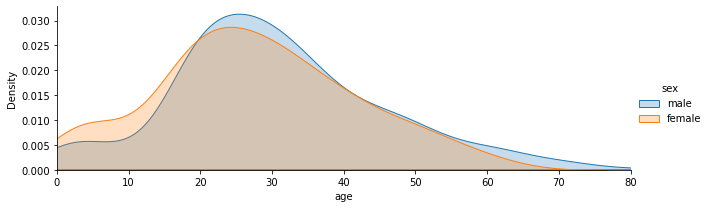

In [133]:
#graph looking at the distribution of age across each sex
age_sex = sns.FacetGrid(titanic_data, hue="sex", aspect=3)
age_sex.map(sns.kdeplot, "age", shade=True).add_legend()
age_sex.set(xlim=(0, 80));

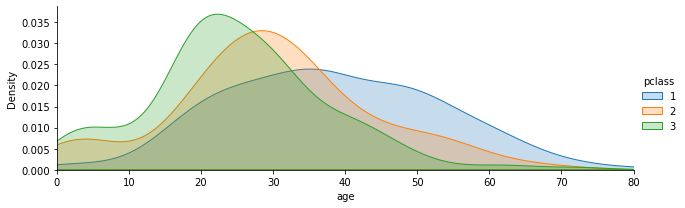

In [134]:
#graph looking at the distribution of age across each Pclass
age_class = sns.FacetGrid(titanic_data, hue='pclass', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "age", shade=True).add_legend()
age_class.set(xlim=(0, 80))

Text(0, 0.5, 'Total')

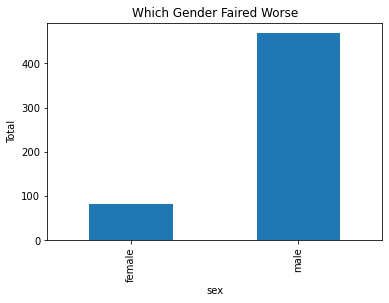

In [135]:
passangers_died = titanic_data.query('survived == 0')
passangers_died.groupby('sex').survived.count().plot.bar()
plt.title('Which Gender Faired Worse')
plt.ylabel('Total')